# Business Case: 24Seven
24Seven has different stores buying various products, based on the purchase history there is a requirement to divide the stores into classes for better inventory management and customer handling.

The column profile looks as follows,

| id | features | description |
| :-: | :-: | :-: |
|01| `Region` | Region of the store (1: Less purchase 2: frequent purchase 3: high purchase)|
|02| `Fresh` | How many fresh items are brought |
|03| `Milk` | How many units of Milk is purchased |
|04| `Grocery` | Units of Grocery bought for the store |
|05| `Frozen` | Frozen items purchased |
|06| `Detergents_Paper` | Unit of Detergents and paper bought |
|07| `Delicassen` | Food related items |
|08| `class` | Type/Category of the Store (1 ,2 , 3)|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data
df = pd.read_csv("24_seven.csv")
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [3]:
# shape of the data
df.shape

(440, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   class             440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


# EDA

In [5]:
# one hot encoding the "Region" column
df = pd.get_dummies(df, columns = ["Region"], dtype = int)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,2,0,0,1
1,7057,9810,9568,1762,3293,1776,2,0,0,1
2,6353,8808,7684,2405,3516,7844,2,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,1
4,22615,5410,7198,3915,1777,5185,1,0,0,1


In [6]:
# storing class label
class_labels = df["class"]
# one hot encoding the "class" column
df = pd.get_dummies(df, columns = ["class"], dtype = int)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,class_1,class_2,class_3
0,12669,9656,7561,214,2674,1338,0,0,1,0,1,0
1,7057,9810,9568,1762,3293,1776,0,0,1,0,1,0
2,6353,8808,7684,2405,3516,7844,0,0,1,0,1,0
3,13265,1196,4221,6404,507,1788,0,0,1,1,0,0
4,22615,5410,7198,3915,1777,5185,0,0,1,1,0,0


In [7]:
x = df.drop(columns = ["class_1", "class_2", "class_3"])
y = df[["class_1", "class_2", "class_3"]]
x.shape, y.shape

((440, 9), (440, 3))

In [8]:
# visualizing the data using PCA
from sklearn.decomposition import PCA

# reducing the features to just 2 features
pca = PCA(n_components = 2)
visual_1 = pca.fit_transform(x)
visual_1.shape

(440, 2)

In [9]:
df2 = pd.DataFrame(visual_1, columns = ["f1", "f2"])
df2["y"] = class_labels
pca.explained_variance_ratio_

array([0.45961362, 0.40517227])

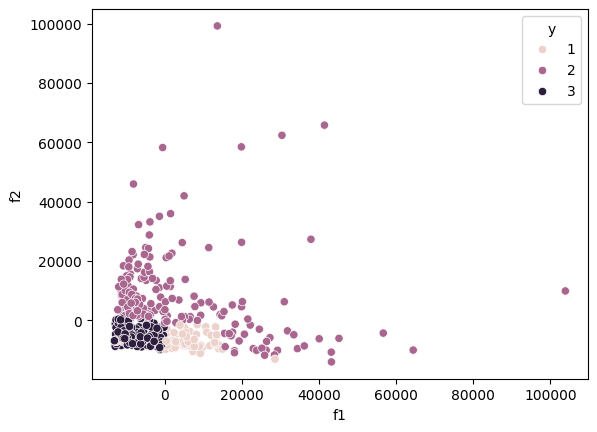

In [10]:
sns.scatterplot(data = df2, x = "f1", y = "f2", hue = "y")
plt.show()

Observe that the data is non-linear, hence to correctly classify the data, a deep neural network is required.

In [11]:
# splitting the data into train, test and validation sets
from sklearn.model_selection import train_test_split

x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 0.1, random_state = 42)
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((356, 9), (356, 3), (40, 9), (40, 3), (44, 9), (44, 3))

In [12]:
# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

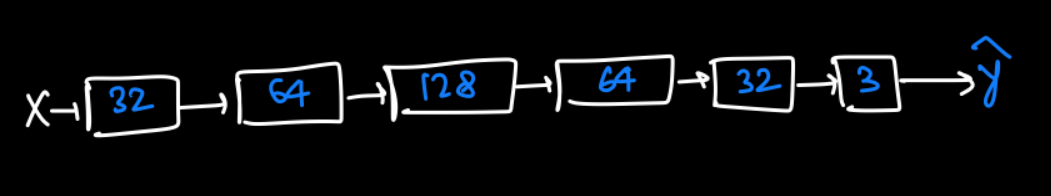

The above is a 7 layer Neural Network such that,

| layer | description |
| :-: | :-: |
| L1 | Input Layer |
| L2 | Contains 32 Neurons |
| L3 | Contains 64 Neurons |
| L4 | Contains 128 Neurons |
| L5 | Contains 64 Neurons |
| L6 | Contains 64 Neurons |
| L7 | Output Layer |

ReLU is used as the activation function between the layers.

In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(42)
tf.random.set_seed(42)

In [14]:
# create a baseline model
def baseline_model():
    model = Sequential(
        [
            Dense(32, activation = "relu", kernel_initializer = "glorot_uniform"),
            Dense(64, activation = "relu", kernel_initializer = "glorot_uniform"),
            Dense(128, activation = "relu", kernel_initializer = "glorot_uniform"),
            Dense(64, activation = "relu", kernel_initializer = "glorot_uniform"),
            Dense(32, activation = "relu", kernel_initializer = "glorot_uniform"),
            Dense(3, activation = "softmax")
        ]
    )

    return model

model = baseline_model()

In [15]:
# using minibatch gradient descent as optimizer
model.compile(
    optimizer = tf.keras.optimizers.SGD(),
    loss = tf.keras.losses.CategoricalCrossentropy()
)

In [16]:
# training a model with "epoch = 10" and "batch_size = 128"
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10, batch_size = 128)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.0777 - val_loss: 1.0646
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0734 - val_loss: 1.0598
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0691 - val_loss: 1.0551
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0649 - val_loss: 1.0505
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0607 - val_loss: 1.0458
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.0564 - val_loss: 1.0410
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0520 - val_loss: 1.0363
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0477 - val_loss: 1.0316
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0435 - val_loss: 1.0269
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0393 - val_loss: 1.0222


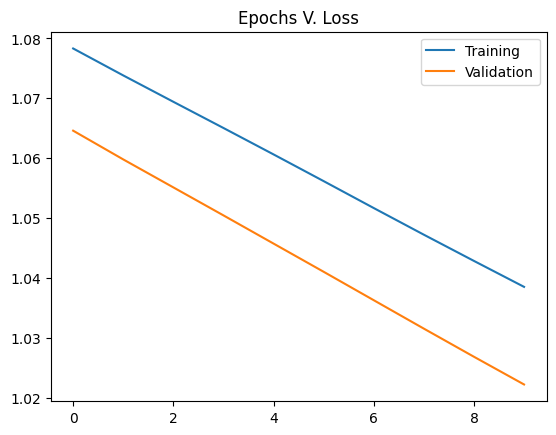

In [17]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, label = "Training")
plt.plot(epochs, val_loss, label = "Validation")
plt.legend()
plt.title("Epochs V. Loss")
plt.show()

Observe that even after 10 epochs, the model still has very high loss.

### What should be done to make the model perform better?
Increasing the epochs of the model will help in improving the performance. Increasing the epoch of the model to 200

In [18]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 200, batch_size = 128, verbose = 0)

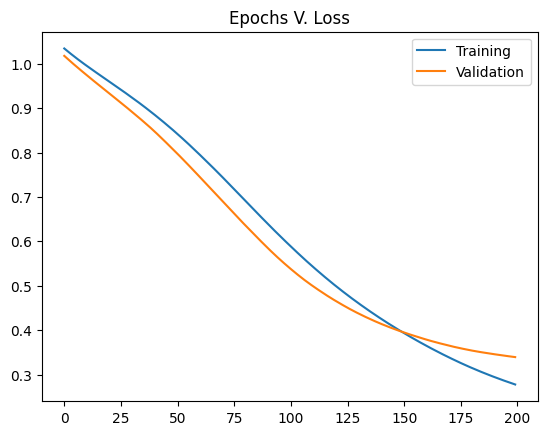

In [19]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, label = "Training")
plt.plot(epochs, val_loss, label = "Validation")
plt.legend()
plt.title("Epochs V. Loss")
plt.show()

Observe that the model requires 200 epochs for to have such low loss.

Now consider that the dataset has 5 million samples,
- The model will require a very high training epochs.
- In order for it to reach minima.

This surely will be a huge drawback while deploying the model.

# Exponential Moving Average
### Why does mini-batch gradient descent take so many epochs?
Mini-batch gradient descent takes a few steps before reaching the global minima. In many of these steps, the optimizer tends to mode in the direction where it will never reach minima. Hence due to all these noisy steps, the gradient descent takes so many epochs.

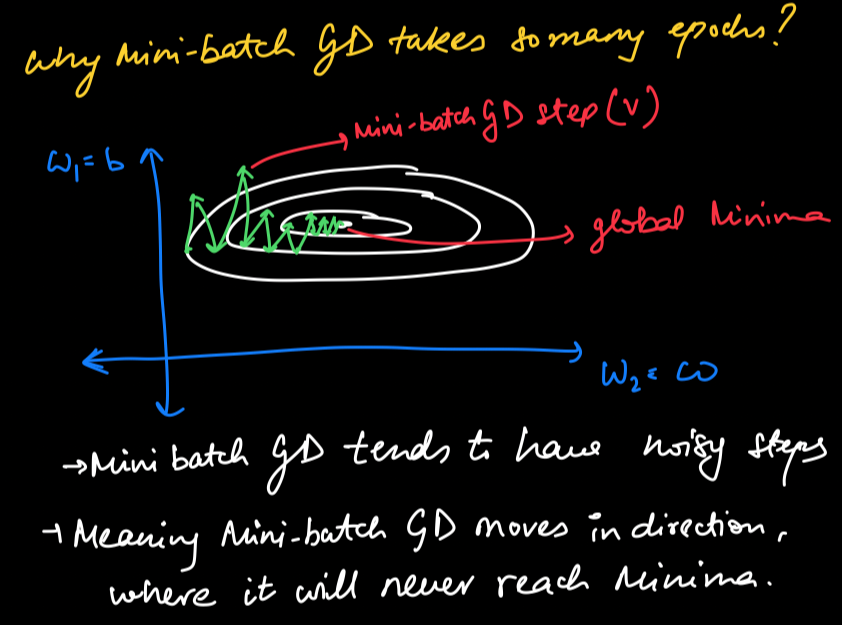

### Why does mini-batch gradient descent have noisy steps?
Since training data is divided into batches, for some batches the model has very small loss, while for a few batches, the loss is quite high. As a result, the weights have high and low values. Thus affecting the steps of mini-batch gradient descent optimizer.

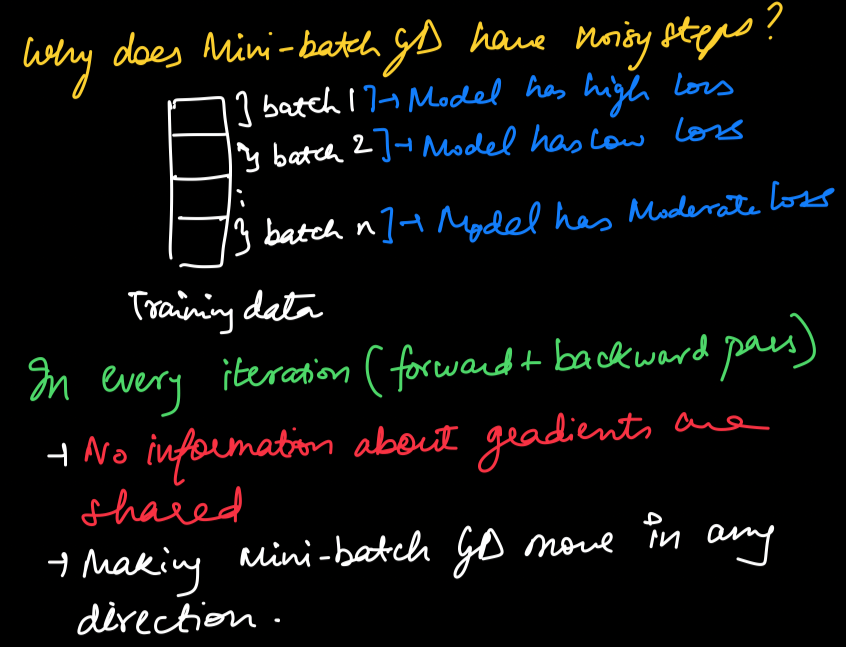

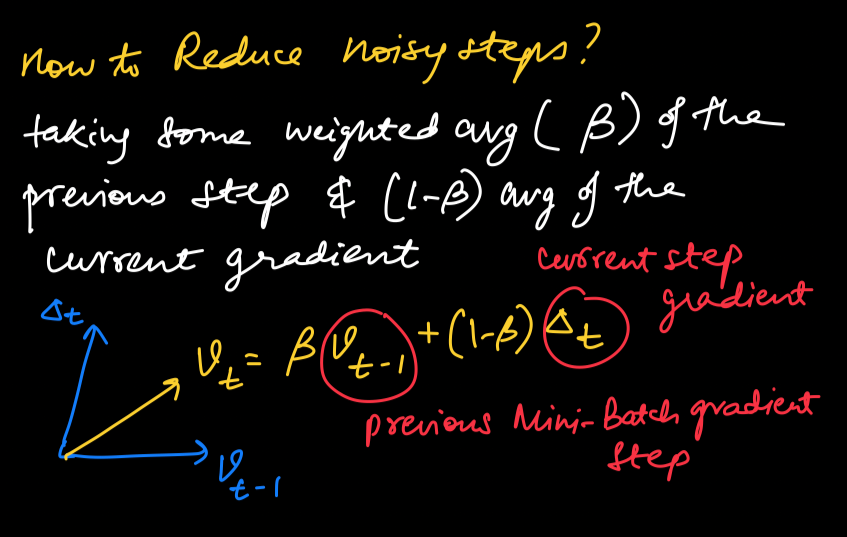

### How to reduce the number of epochs during the training of the model?
By decreasing the number of steps ($V$) optimization algorithm takes to reach the global minima.

### How can the algorithm be optimized to minimize the number of steps (V) required to reach the global minimum?
By incorporating past steps into the update process, the optimizer can be directed towards the global minimum.

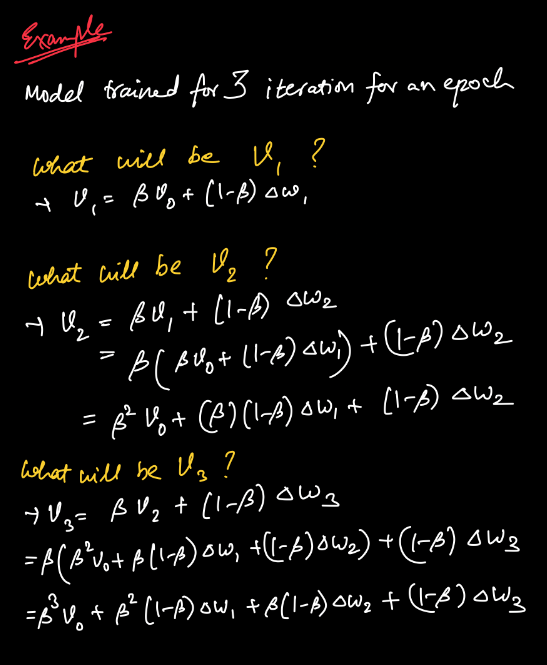

### Will combining the past steps taken by the optimizer help?
To understand this, consider a model trained for 3 iterations and 1 iteration = forward propagation + backward propagation. Where,
- $V_1 = \beta * V_0 + (1 - \beta) * \Delta w_1$.
- $V_2 = \beta^2 * V_0 + \beta * (1 - \beta) * \Delta w_1 + (1 - \beta) * \Delta w_2$.
- $V_3 = \beta^3 * V_0 + \beta^2 * (1 - \beta) * \Delta w_1 + \beta * (1 - \beta) * \Delta w_2 + (1 - \beta) * \Delta w_3$.

Thus using exponential moving average, the optimizer updates its direction according to the previous steps taken and smoothes out its current direction in order to reach global minima faster.

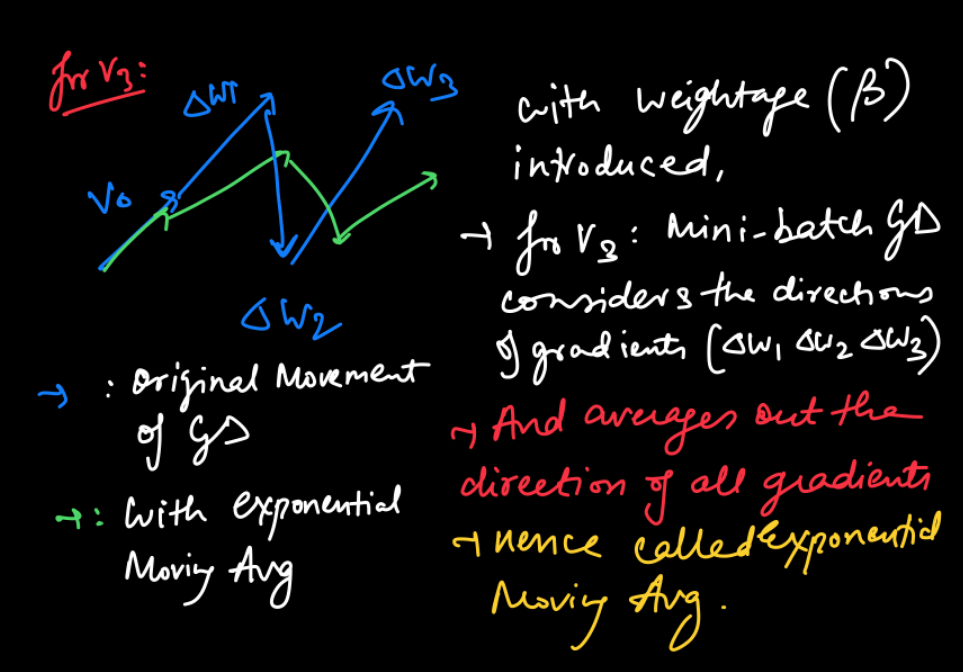